In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Read Dataset and transform to DataFrame

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving diabetes.csv to diabetes (1).csv
User uploaded file "diabetes (1).csv" with length 23875 bytes


In [ ]:
diabetes= pd.read_csv('diabetes (1).csv')

# Data Analysis

In [ ]:
# gives information about the data types,columns, null value counts, memory usage etc

In [ ]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# Display general statistic summary

In [ ]:
diabetes.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


Notice that you have zero values in the columns:

* Glucose
* BloodPressure
* SkinThickness
* Insulin
* BMI

You have to replace the zero values

In [ ]:
diabetes_data = diabetes.copy(deep = True)
#Replace the zero values to Nan, it is easy to count the null values
diabetes_data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

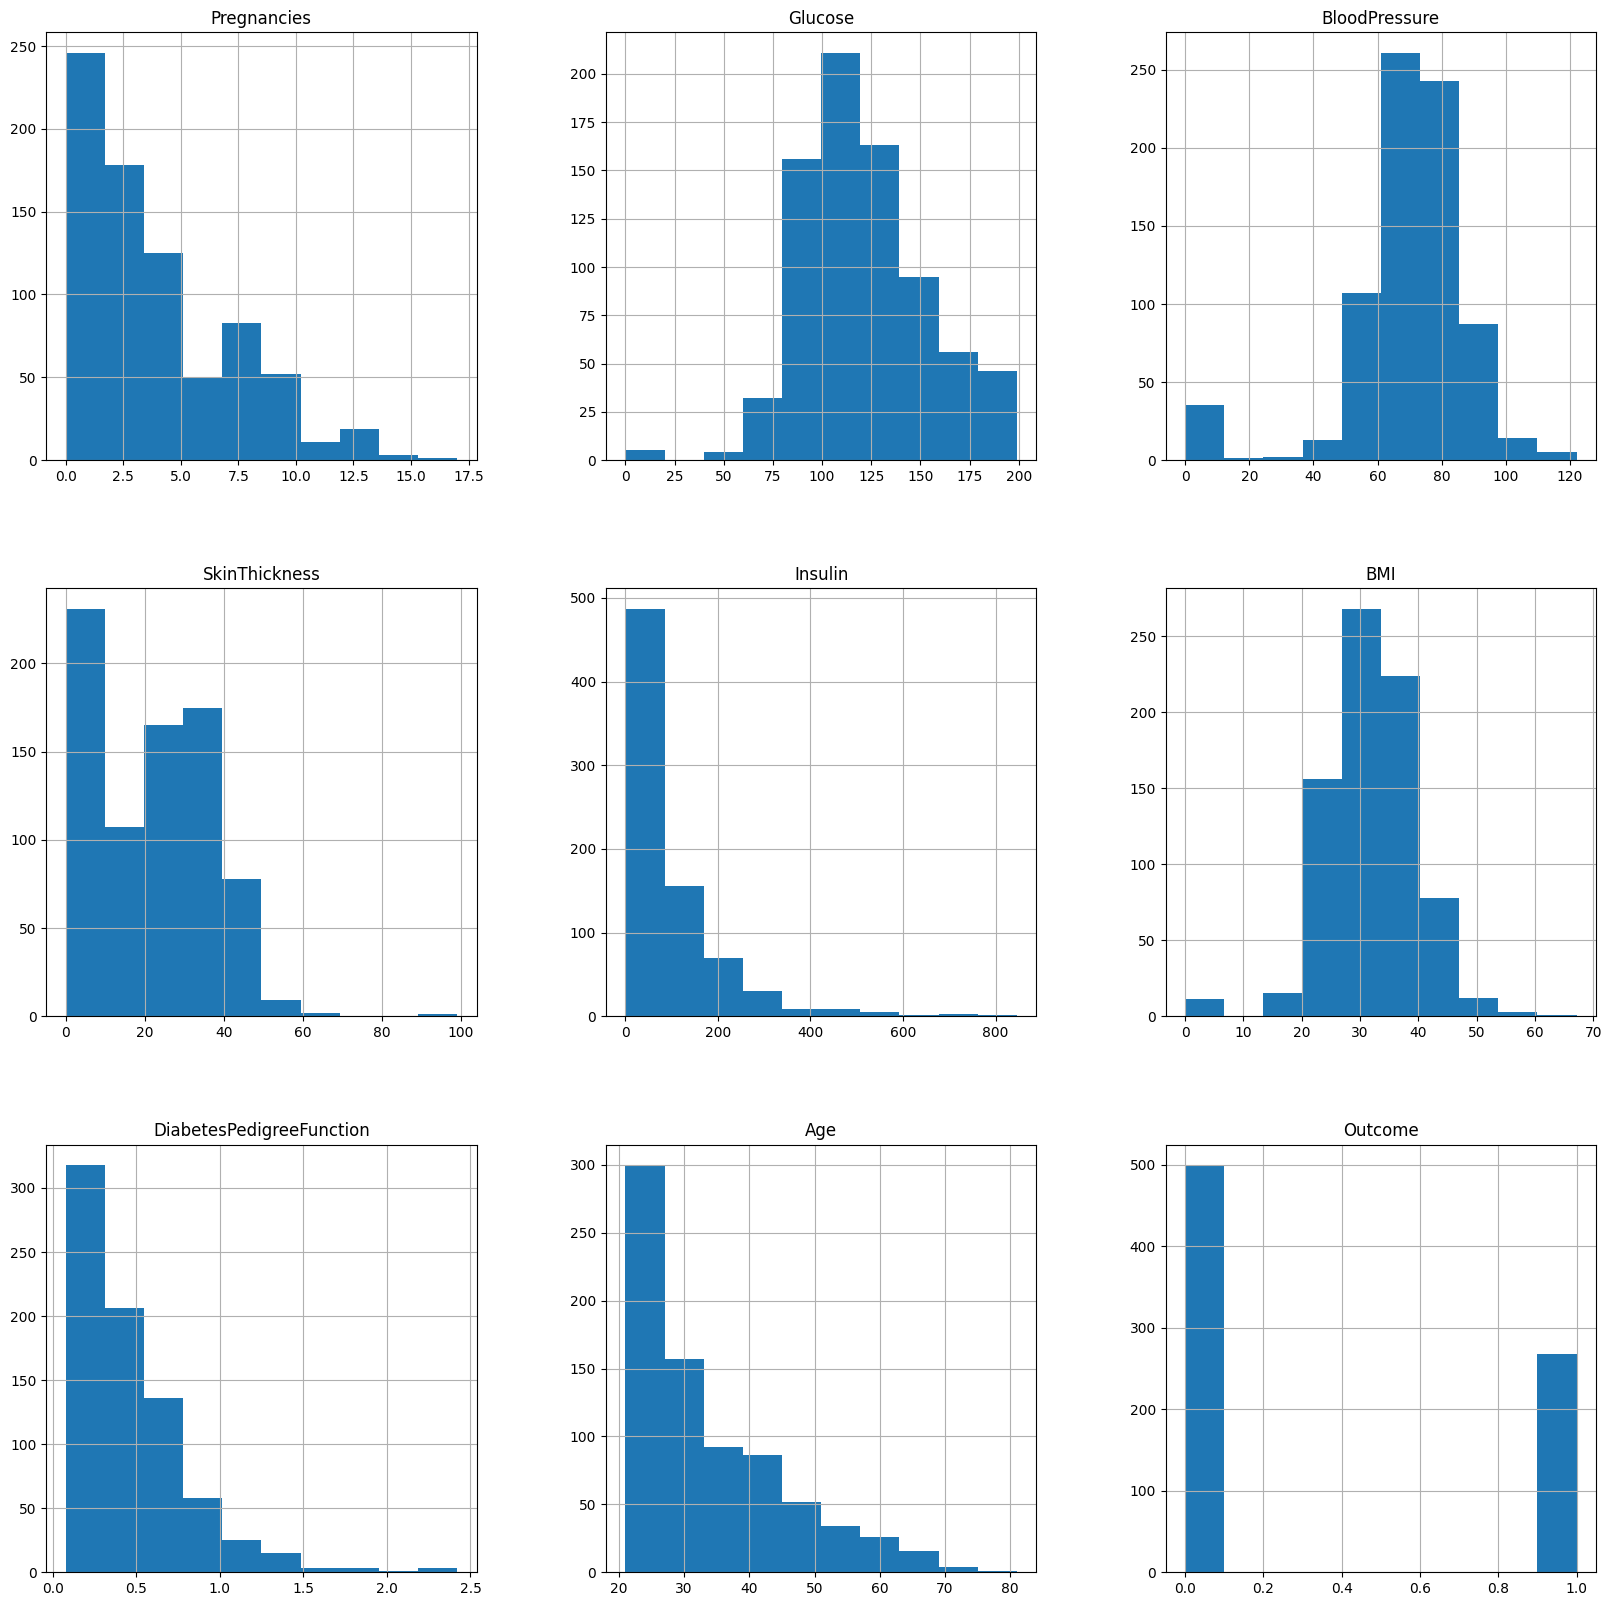

In [ ]:
p = diabetes.hist(figsize = (20,20),bins=10)

<Axes: xlabel='Outcome', ylabel='Age'>

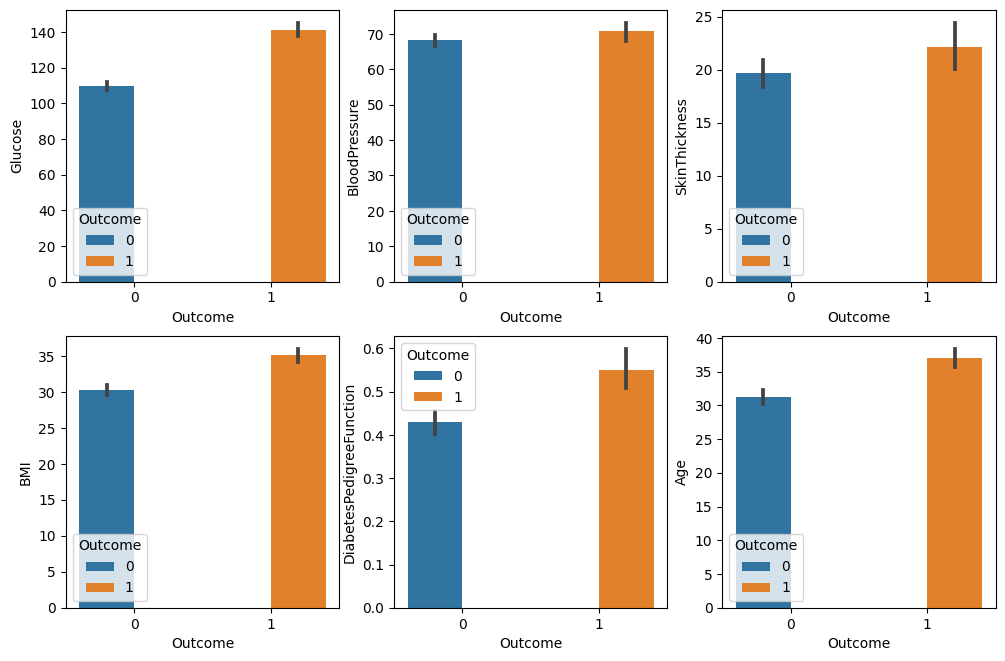

In [ ]:
plt.figure(figsize=(12,12))
plt.subplot(3,3,1)
sns.barplot(x='Outcome',y='Glucose',data=diabetes,hue="Outcome")
plt.subplot(3,3,2)
sns.barplot(x='Outcome',y='BloodPressure',data=diabetes,hue="Outcome")
plt.subplot(3,3,3)
sns.barplot(x='Outcome',y='SkinThickness',data=diabetes,hue="Outcome")
plt.subplot(3,3,4)
sns.barplot(x='Outcome',y='BMI',data=diabetes,hue="Outcome")
plt.subplot(3,3,5)
sns.barplot(x='Outcome',y='DiabetesPedigreeFunction',data=diabetes,hue="Outcome")
plt.subplot(3,3,6)
sns.barplot(x='Outcome',y='Age',data=diabetes,hue="Outcome")

In [ ]:
no_diabetic, diabetic = diabetes['Outcome'].value_counts()

In [ ]:
print('Percent of people without diabetes: {}%'.format(no_diabetic / (no_diabetic + diabetic) * 100))
print('Percent of people with diabetes: {}%'.format(diabetic / (no_diabetic + diabetic) * 100))

Percent of people without diabetes: 65.10416666666666%
Percent of people with diabetes: 34.89583333333333%


#Split your data

Remember that scikit learn can return 4  partitions of your dataset (x_train, x_test,y_tran,y_test).


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(diabetes_data,diabetes['Outcome'], test_size = 0.2, random_state=42)

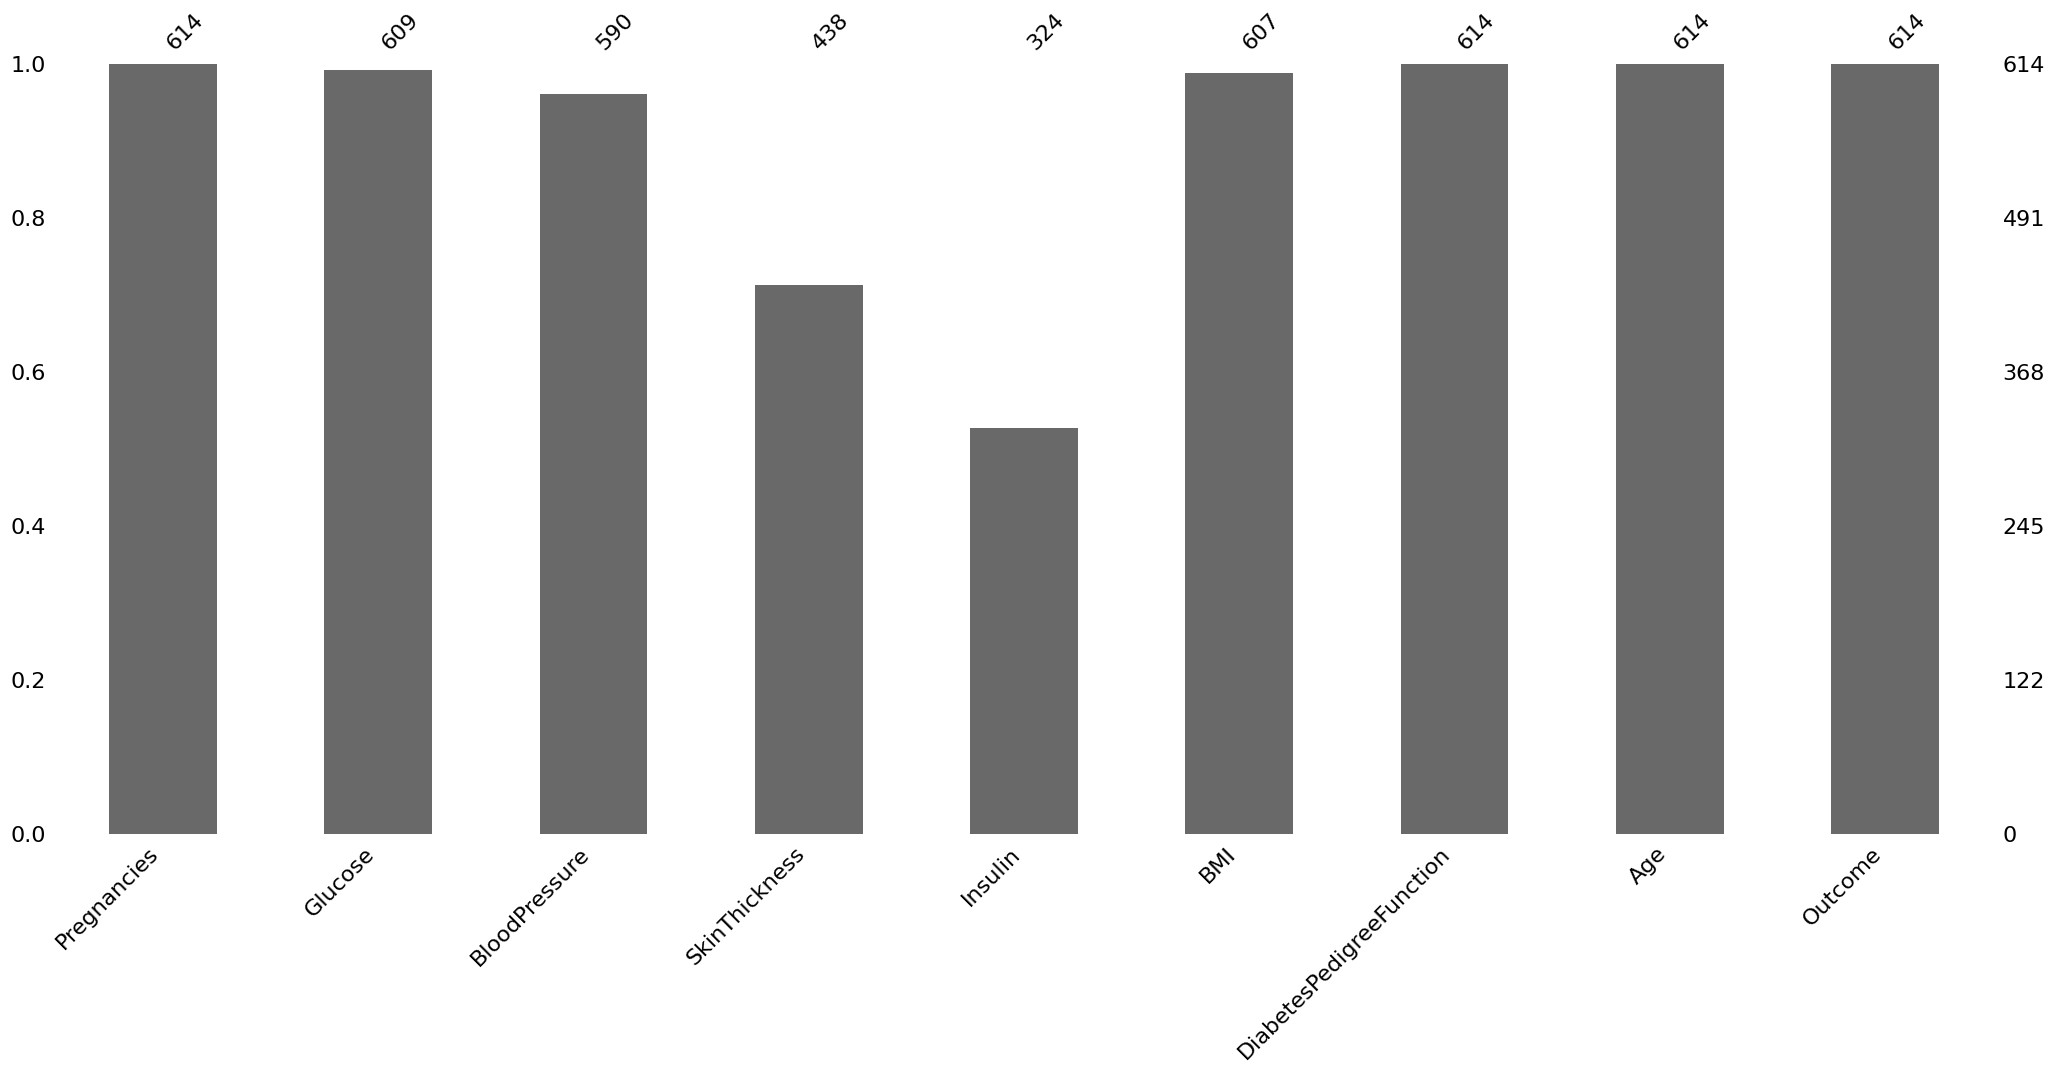

In [ ]:
import missingno as msno
p=msno.bar(x_train)

In [ ]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614 entries, 60 to 102
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               614 non-null    int64  
 1   Glucose                   609 non-null    float64
 2   BloodPressure             590 non-null    float64
 3   SkinThickness             438 non-null    float64
 4   Insulin                   324 non-null    float64
 5   BMI                       607 non-null    float64
 6   DiabetesPedigreeFunction  614 non-null    float64
 7   Age                       614 non-null    int64  
 8   Outcome                   614 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 48.0 KB


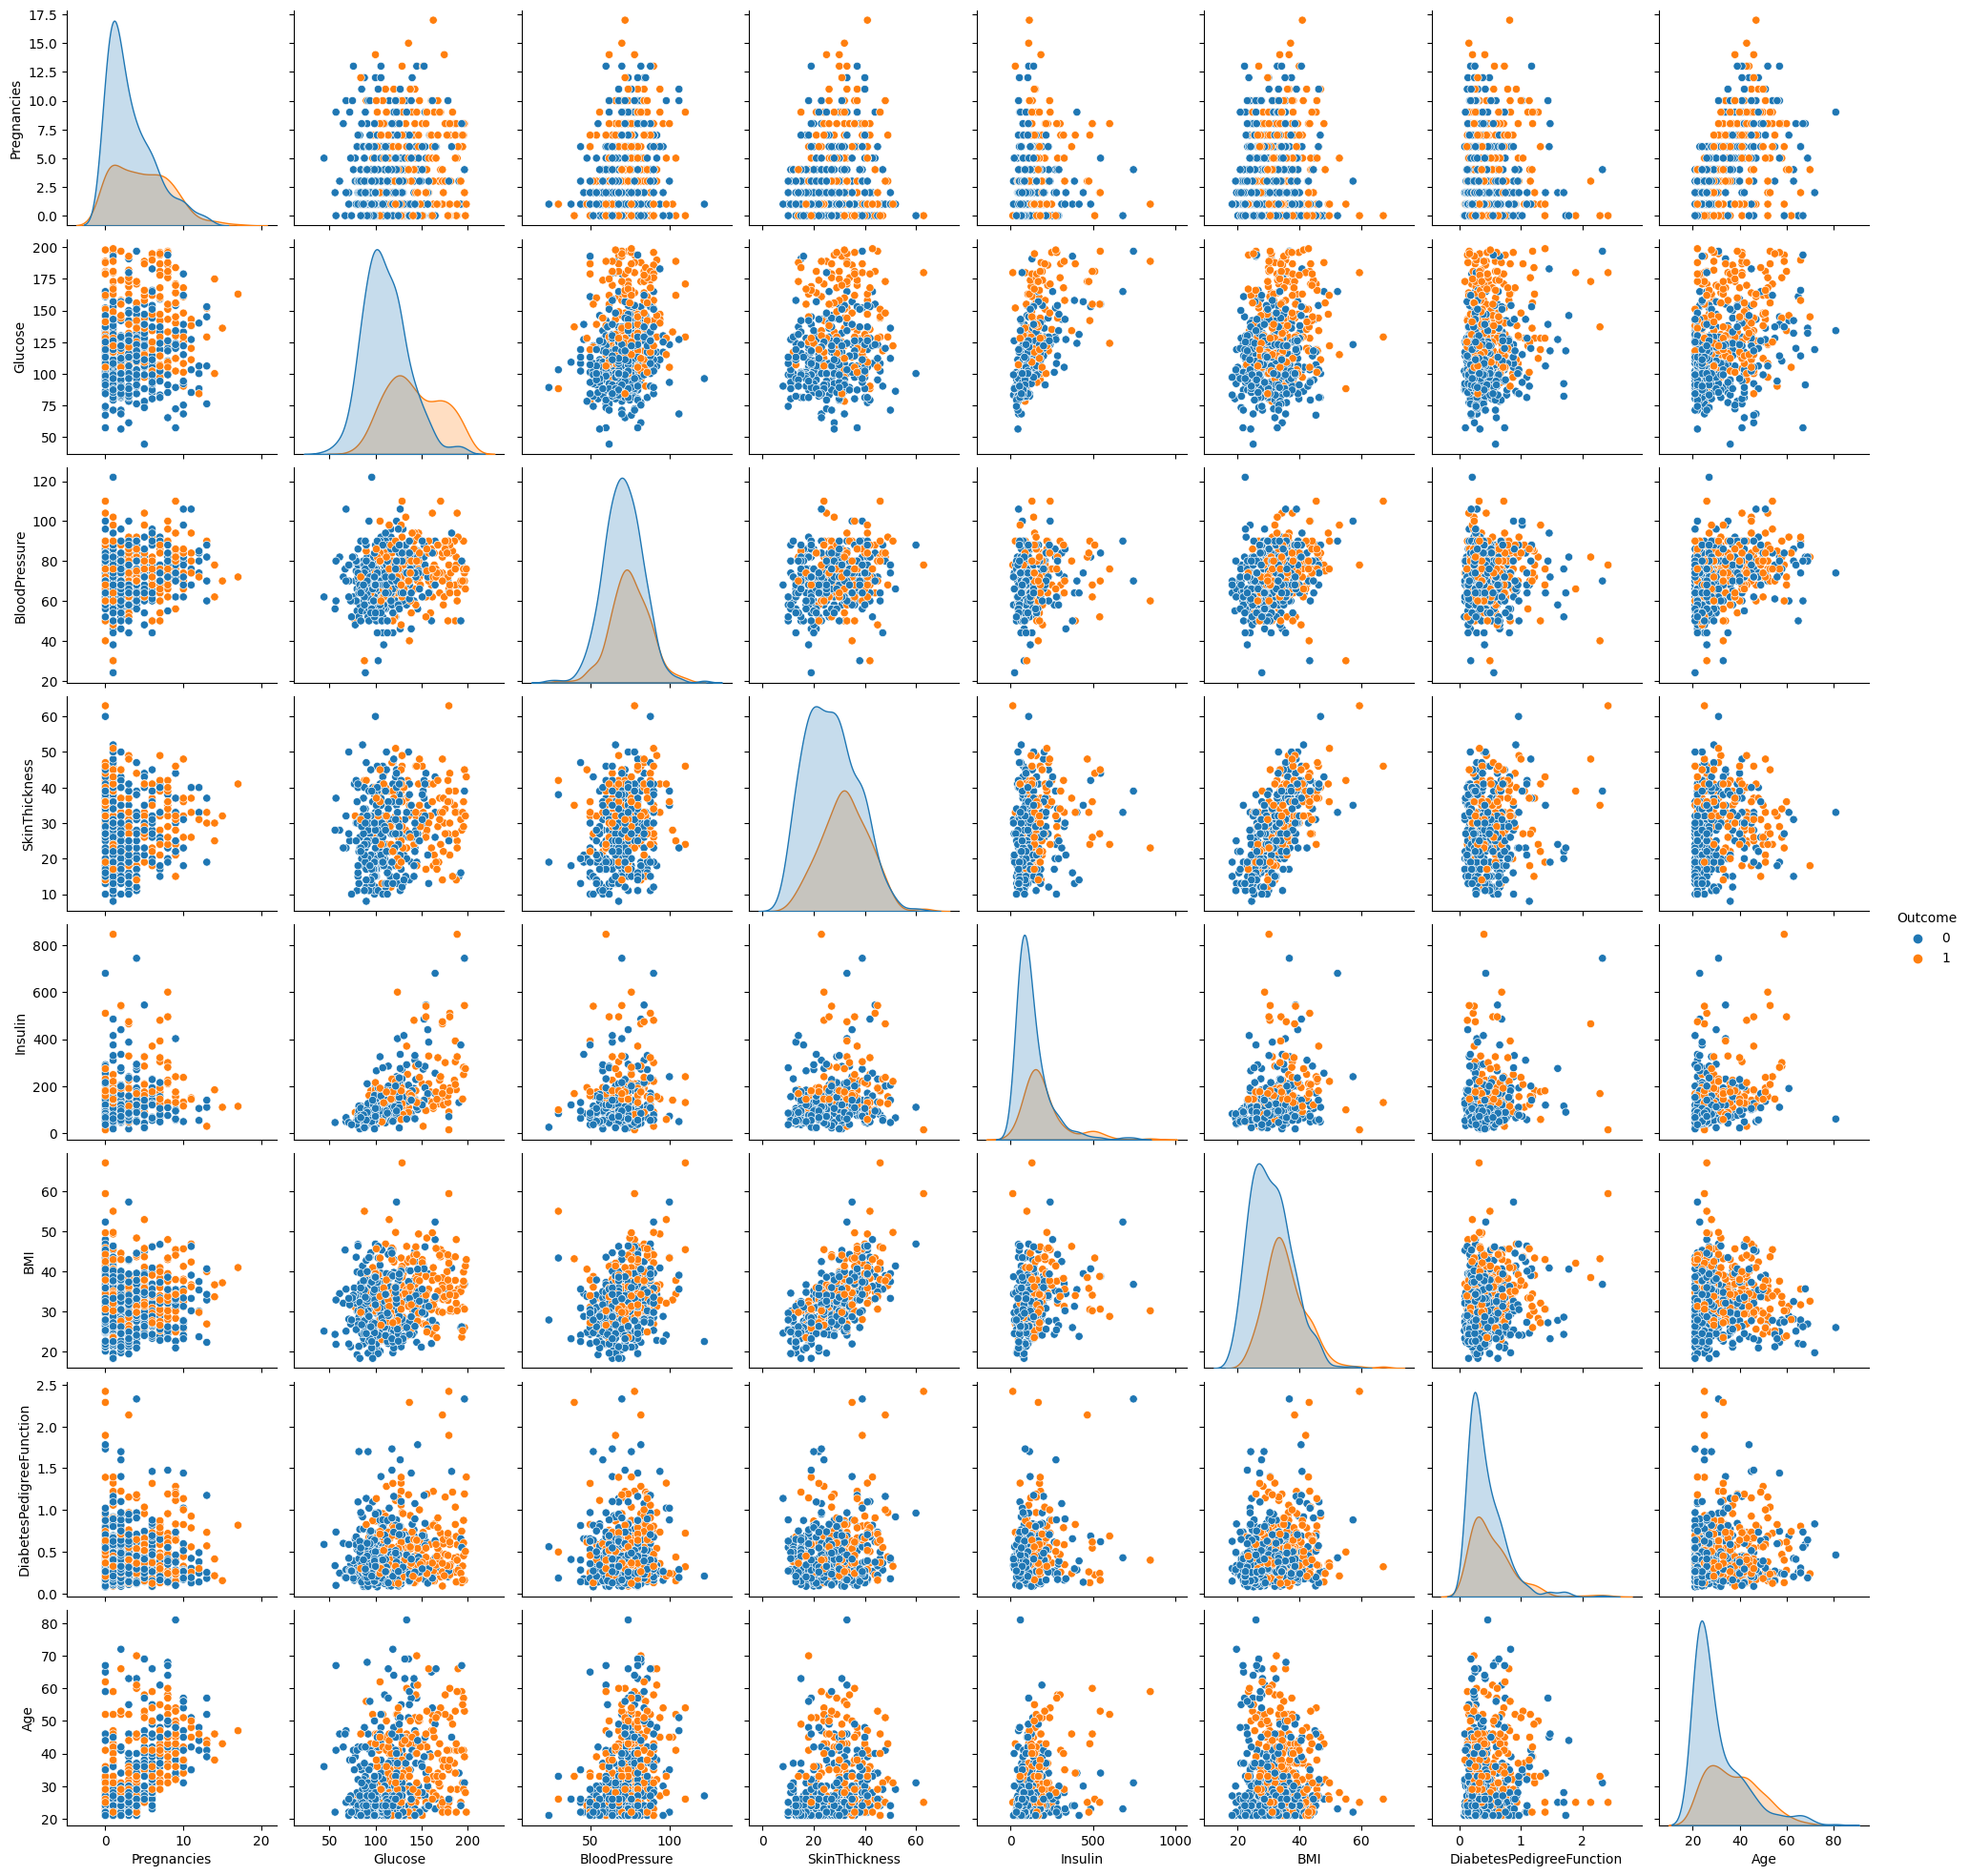

In [ ]:
sns.pairplot(x_train,hue = 'Outcome')


In [ ]:
corr_matrix = x_train.corr()
corr_matrix["Outcome"].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.491236
BMI                         0.320409
Insulin                     0.284383
Age                         0.280654
SkinThickness               0.252900
Pregnancies                 0.207550
BloodPressure               0.163301
DiabetesPedigreeFunction    0.154560
Name: Outcome, dtype: float64

Text(0.5, 1.0, 'Correlation matrix heatmap')

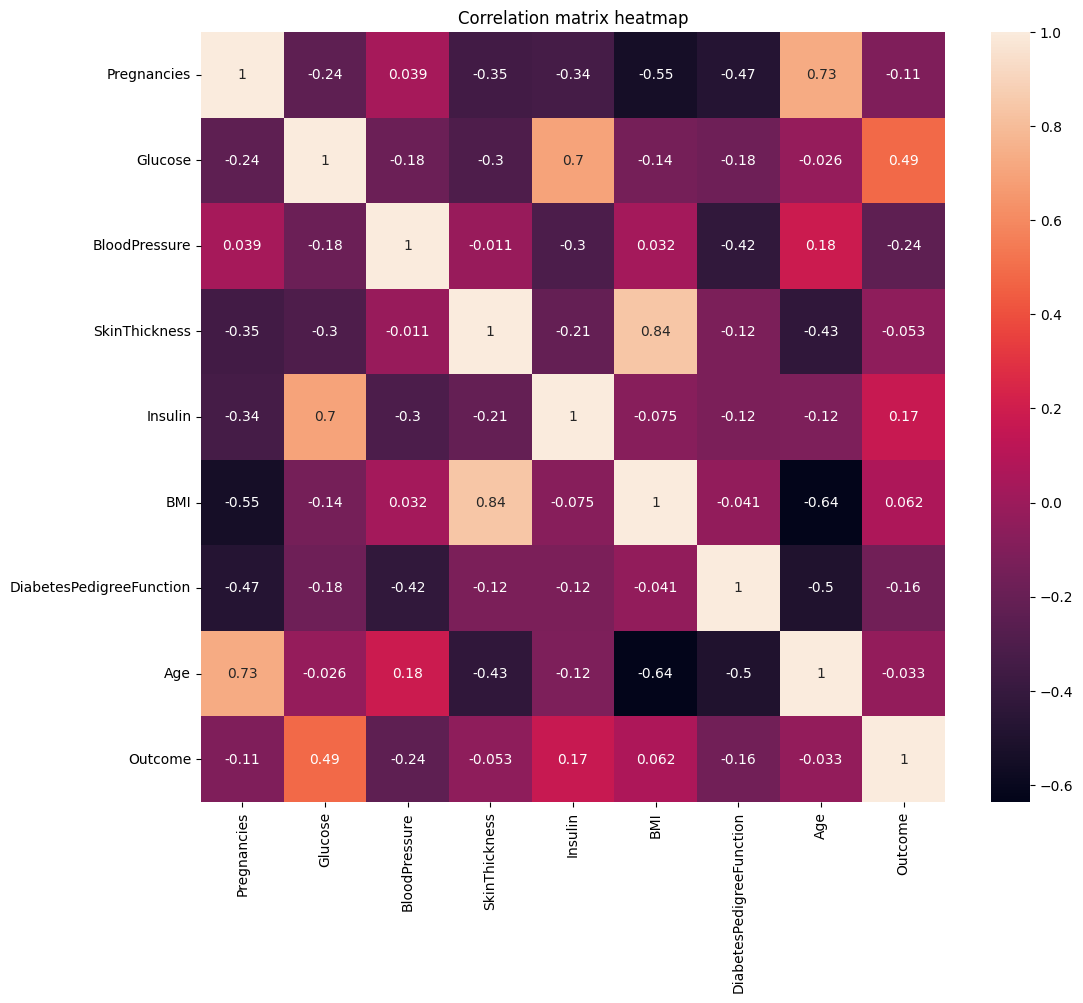

In [ ]:
plt.figure(figsize=(12,10))
p=sns.heatmap(corr_matrix.corr(), annot=True)
plt.title("Correlation matrix heatmap")

# Create your custom data transformation

Remove a column of your dataset with
#### ```df.drop(column_name,axis,inplace=True)```

In [ ]:
#Remove from X_train dataset the expected labels
### Write your code here
x_train.drop(['Outcome'], axis=1,inplace=True)

In [ ]:
medians = x_train.median()
medians

Pregnancies                   3.0000
Glucose                     118.0000
BloodPressure                72.0000
SkinThickness                28.5000
Insulin                     120.0000
BMI                          32.0000
DiabetesPedigreeFunction      0.3725
Age                          29.0000
Outcome                       0.0000
dtype: float64

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

In [ ]:
class TransformData(BaseEstimator, TransformerMixin):
  def fit(self, X, y=None):
    return self
  def transform(self,X,y=None):
    X['Glucose'] = X['Glucose'].fillna(medians['Glucose'])
    X['BloodPressure'] = X['BloodPressure'].fillna(medians['BloodPressure'])
    X['SkinThickness'] = X['SkinThickness'].fillna(medians['SkinThickness'])
    X['Insulin'] = X['Insulin'].fillna(medians['Insulin'])
    X['BMI'] = X['BMI'].fillna(medians['BMI'])

    return X

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
pipeline = Pipeline([
    ('transform_data',TransformData()),
    ('std_scaler',StandardScaler()),
])

In [ ]:
x_train_pipe = pipeline.fit_transform(x_train)

In [ ]:
df=pd.DataFrame(data = x_train_pipe, columns=x_train.columns)

In [ ]:
len(df) # inspect the transformed data

614

In [ ]:
len(y_train)

614

In [ ]:
## Try with knn

In [ ]:
X_train,X_val,y_train,y_val = train_test_split(df,y_train,test_size=0.2,random_state=42, stratify=y_train)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
val_scores = []
train_scores = []

In [ ]:
for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)

    train_scores.append(knn.score(X_train,y_train))
    val_scores.append(knn.score(X_val,y_val))

In [ ]:
max_train_score = max(train_scores)
max_train_score

1.0

In [ ]:
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [ ]:
train_scores

[1.0,
 0.8676171079429735,
 0.8553971486761711,
 0.8309572301425662,
 0.8370672097759674,
 0.824847250509165,
 0.8309572301425662,
 0.824847250509165,
 0.8309572301425662,
 0.814663951120163,
 0.8065173116089613,
 0.8004073319755601,
 0.8024439918533605,
 0.7983706720977597]

In [ ]:
val_scores

[0.6585365853658537,
 0.6910569105691057,
 0.7154471544715447,
 0.7154471544715447,
 0.7398373983739838,
 0.7479674796747967,
 0.7317073170731707,
 0.7642276422764228,
 0.7317073170731707,
 0.7317073170731707,
 0.7479674796747967,
 0.7479674796747967,
 0.7317073170731707,
 0.7317073170731707]

In [ ]:
max_val_score = max(val_scores)
max_val_score

0.7642276422764228

In [ ]:

max_val_score = max(val_scores)
val_scores_ind = [i for i, v in enumerate(val_scores) if v == max_val_score]
print('Max test score {} % and k = {}'.format(max_val_score*100,list(map(lambda x: x+1, val_scores_ind))))



Max test score 76.42276422764228 % and k = [8]


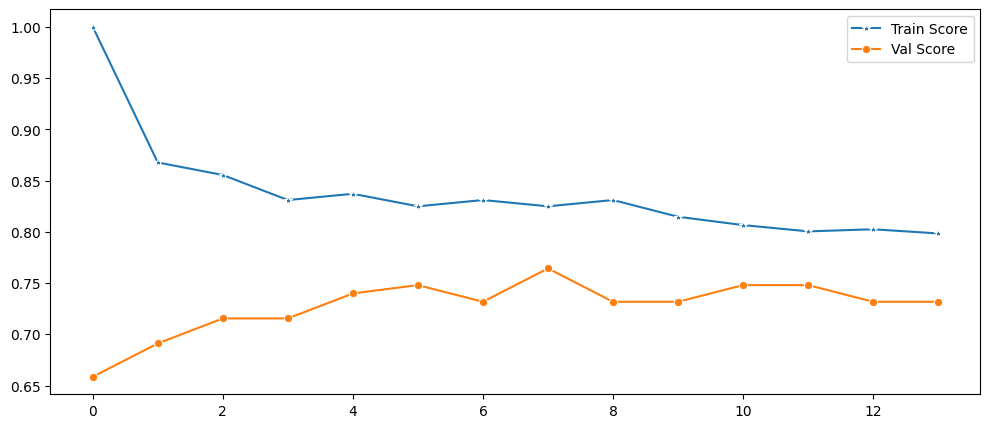

In [ ]:
plt.figure(figsize=(12,5))
p = sns.lineplot(train_scores,marker='*',label='Train Score')
#p = sns.lineplot((range(1,15),train_scores),marker='*',label='Train Score')
p = sns.lineplot(val_scores,marker='o',label='Val Score')


In [ ]:

#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(8)

knn.fit(X_train,y_train)
knn.score(X_val,y_val)

0.7642276422764228

# Model exploration


In [1]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
models = [
    # Clasifier KNN
    KNeighborsClassifier(),
    # Tree Decision
    DecisionTreeClassifier(random_state=42),
    # SVM
    SVC(random_state=42)
]

In [ ]:
parameters = [
    # Parametros para KNN
    {
        # Para el parámetro n_neighbors se probarán todos los valores del 1 al 35
        'n_neighbors': np.arange(1, 36)
    },
    # Parametros para árboles de decisión
    {
        # Para el parámetro max_depth se probarán todos los valores del 1 al 20
        'max_depth': np.arange(1, 21)
    },

    # Parametros para SVMs
    {
        # Para el parámetro degree se probarán todos los valores del 1 al 5
        'degree': np.arange(1, 6)
    }
]

In [ ]:
for model, param_grid in zip(models, parameters):
    print('\n-------- Evaluando {} --------'.format(type(model)))
    # Se realiza la exploración de parámetros para cada modelo
    model_gs = GridSearchCV(
                # El modelo sobre el cuál se probarán los parámetros.
                model,
                # Los parámetros que se probarán (diccionario).
                param_grid,
                # Al final se reajustará el modelo con todos los datos disponibles.
                refit=True,
                # Nivel de resumen mostrado al hacer la búsqueda.
                verbose=0,
                cv=5,

                scoring='accuracy'
            )

    # Se ajusta el modelo utilizando la exploración de parámetros
    model_gs.fit(X_train, y_train)

    print('Lo parámetros seleccionados son {}'.format(model_gs.best_params_))

    best_model_index = np.argmin(model_gs.cv_results_['rank_test_score'])

    print('La exactitud en el conjunto de entrenamiento, utilizando CV es {:.3f}'.format(
        model_gs.cv_results_['mean_test_score'][best_model_index]
    ))

    print('La exactitud en el conjunto de prueba es {:.3f}'.format(
        accuracy_score(y_val, model_gs.best_estimator_.predict(X_val))
    ))


-------- Evaluando <class 'sklearn.neighbors._classification.KNeighborsClassifier'> --------
Lo parámetros seleccionados son {'n_neighbors': 7}
La exactitud en el conjunto de entrenamiento, utilizando CV es 0.772
La exactitud en el conjunto de prueba es 0.732

-------- Evaluando <class 'sklearn.tree._classes.DecisionTreeClassifier'> --------
Lo parámetros seleccionados son {'max_depth': 3}
La exactitud en el conjunto de entrenamiento, utilizando CV es 0.758
La exactitud en el conjunto de prueba es 0.748

-------- Evaluando <class 'sklearn.svm._classes.SVC'> --------
Lo parámetros seleccionados son {'degree': 1}
La exactitud en el conjunto de entrenamiento, utilizando CV es 0.778
La exactitud en el conjunto de prueba es 0.748


In [ ]:
model_gs

GridSearchCV(cv=5, estimator=SVC(random_state=42),
             param_grid={'degree': array([1, 2, 3, 4, 5])}, scoring='accuracy')

# Can we improve our model, try new data transformations

In [ ]:
x_train_c = np.concatenate([X_train,X_val],axis=0)


In [ ]:
y_train_c = np.concatenate([y_train,y_val])

In [ ]:
### final

In [ ]:
final_model = model_gs.best_estimator_

In [ ]:
final_model.fit(x_train_c,y_train_c)

SVC(degree=1, random_state=42)

In [ ]:
x_test.drop(['Outcome'], axis=1,inplace=True)

In [ ]:
X_test = pipeline.fit_transform(x_test)


In [ ]:
y_pred_tr = final_model.predict(X_test)

In [ ]:
# Confusion Matrix and Accuracy Score
cm_3 = confusion_matrix(y_test, y_pred_tr)
a_3 = accuracy_score(y_test, y_pred_tr)

In [ ]:
print('Confusion Matrix for Random Forest :\n', cm_3)
print('Accuracy Score for Random Forest :\n', a_3)

Confusion Matrix for Random Forest :
 [[83 16]
 [23 32]]
Accuracy Score for Random Forest :
 0.7467532467532467
